# Part 1


We land inside the whole circle always so we get $\pi$ for free. 

Where should we land in the circle? We can get the two largest areas if we 
land *between* the two largest circles. If we land in the very center of the circle we can acheive

$$
\begin{equation*}
\begin{aligned}
\pi + 2 \sum_{k = 1}^\infty \pi \left(\frac{1}{2^k}\right)^2 & = \pi + \frac{\pi}{2} \sum_{k = 0}^\infty  \left(\frac{1}{4}\right)^k\\
& = \pi + \frac{\pi}{2} \frac{1}{1 - 1/4}\\
& = \pi + \frac{2}{3}\pi\\
& = \boxed{\frac{5}{3}\pi}
\end{aligned}
\end{equation*}
$$


# Part 2


Let $E$ be the expected value scored given that you land somewhere randomly in the gasket of radius $r$.

Suppose we are considering the outer circle $O$ of radius 1. If there is some circle $C$ of radius $r < 1$ in $O$ then $C$'s contribution to the expectation is 
$$\frac{\pi r^2}{\pi 1^2}\left(\pi r^2 + \frac{r^2}{1^2} E\right) = r^4(\pi + E)$$

Therfore if the initial gasket is composed of radii $r_1, r_2, \ldots$ (allowing for repeats to match proper multiplicity) we have

 $$E = \sum_i r_i^4(\pi + E) \implies E = \frac{\pi \sum_i r_i^4}{1 - \sum_i r_i^4}$$

 Which if we let $C = \sum_i r_i^4$ can be succiently written as 

 $$\boxed{E = \frac{\pi C}{1 - C}}.$$

 Note that we still need to tack on the initial $\pi$ from landing in the large circle, we thus have the expected value of our throw is given by
$$E + \pi  =\frac{\pi }{1 - C}$$

It thus suffices to find $C$. We can now use a formula found from the wiki to generate many of the circles in our given apolloian gasket and approximate $C$.



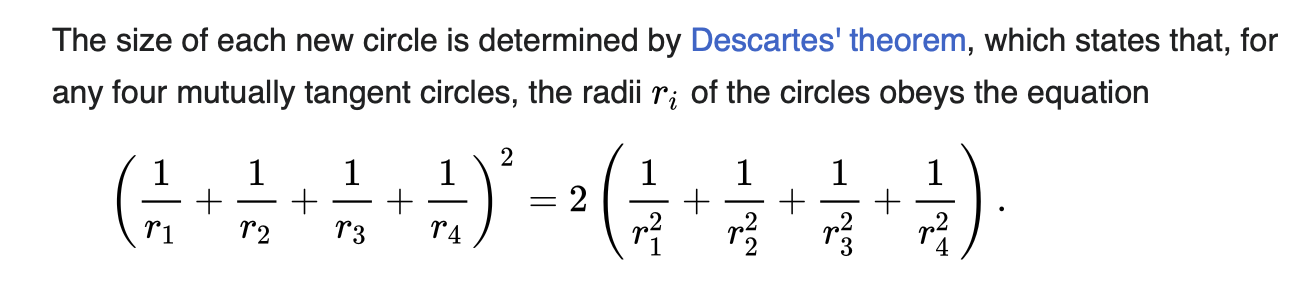

Lets generate radii and see if we can find a pattern.

This implies, given radii $r_1, r_2, r_3$, (one of which may be negative implying it is the outer circle of radius 1), give rise to the circle between them of radius 

$$\boxed{r' = \frac{1}{\frac{1}{r_1} + \frac{1}{r_2}+ \frac{1}{r_3} + 2 \sqrt{\frac{1}{r_1 r_2} + \frac{1}{r_1 r_3}+ \frac{1}{r_2 r_3}}}}$$

We can now do a `BFS` to generate the circles that are in our gasket and take the sum of the 4th powers of their radii to approximate $C$

In [12]:
from numpy import pi as PI

from math import sqrt
from collections import Counter


def nxt_r(r1, r2, r3):
    s_recip = 1 / r1 + 1 / r2 + 1 / r3
    d_recip = 1 / (r1 * r2) + 1 / (r1 * r3) + 1 / (r2 * r3)
    return 1 / (s_recip + 2 * sqrt(d_recip))


def create_radii(num_rounds):

    all_radii = [1 / 2]
    cur_radii = [(1 / 2, 1 / 2, -1)]

    for _ in range(num_rounds):
        new_radii = []

        for r1, r2, r3 in cur_radii:
            r4 = nxt_r(r1, r2, r3)
            all_radii.append(r4)

            new_radii.append((r4, r1, r2))
            new_radii.append((r4, r1, r3))
            new_radii.append((r4, r2, r3))

        cur_radii = new_radii
    return Counter(all_radii)


total_area = 0
C = 0
R_counts = create_radii(17)

for r, cnt_r in R_counts.items():
    C += 2 * cnt_r * r**4  # double the counts for the full circle
    total_area += 2 * cnt_r * r**2

print(f"sum of r^4 = {C:.6f}")
print(f"total area = {(total_area):.6f}")
print(f"expected score = {PI  / (1 - C):.6f}")

sum of r^4 = 0.153286
total area = 0.999210
expected score = 3.710333


In [ ]:


sqrt(t)

0.5